### Install Necessary Libraries

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import plotly.express as px
import plotly.graph_objects as go

### Do not run the code untill the part of: **Data Preperation for training purposes**
Because it will not work since I have worked on the data which were in my local due to different way of installation of the data, so I shared the final version of the data (main_data) on the internet and used it from there, but you can see what I have done to maintain this data based on the other datasets, which I have provided links for each here:
##
HICP - inflation rate: https://ec.europa.eu/eurostat/databrowser/view/tec00118/default/table?lang=en 
##
Unemployment rate - annual data: https://ec.europa.eu/eurostat/databrowser/view/tipsun20/default/table?lang=en 
##
Standardised house price-to-income ratio – annual data: https://ec.europa.eu/eurostat/databrowser/view/tipsho60/default/table?lang=en 
##
Real GDP per capita: https://ec.europa.eu/eurostat/databrowser/view/sdg_08_10/default/table?lang=en
##
I downloaded these datasets manually, and edited on excel because of the wrong replacements and sheets, but I have printed these datasets below, so it should be enough for you to understand what kind of data they have, you can also check the links if you want to, but do not run the codes until the part: **Data Preperation for training purposes**

### Read data and make cleaning, adjustments for data to be able to worked on

In [2]:
price_to_income = pd.read_csv('house_price_to_income_ratio.csv')
gdp_per_capita = pd.read_csv('gdp_per_capita.csv')
hicp_inflation_rate = pd.read_csv('HICP_inflation_rate.csv')

In [3]:
print(price_to_income.columns)

Index(['Country', 'Year', 'Value'], dtype='object')


In [4]:
print(gdp_per_capita.columns)

Index(['Country', 'Year', 'Value'], dtype='object')


In [5]:
print(hicp_inflation_rate.columns)

Index(['Country', 'Year', 'Value'], dtype='object')


In [22]:
# Check for the same countries and years in all datasets
print(price_to_income['Country'].unique())
print(gdp_per_capita['Country'].unique())
print(hicp_inflation_rate['Country'].unique())

print(price_to_income['Year'].unique())
print(gdp_per_capita['Year'].unique())
print(hicp_inflation_rate['Year'].unique())


['European Union - 27 countries (from 2020)'
 'Euro area – 20 countries (from 2023)' 'Belgium' 'Bulgaria' 'Czechia'
 'Denmark' 'Germany' 'Estonia' 'Ireland' 'Greece' 'Spain' 'France'
 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania' 'Luxembourg' 'Hungary'
 'Malta' 'Netherlands' 'Austria' 'Poland' 'Portugal' 'Romania' 'Slovenia'
 'Slovakia' 'Finland' 'Sweden']
['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden' 'Iceland'
 'Norway' 'Switzerland' 'United Kingdom' 'North Macedonia' 'Albania'
 'Serbia' 'Türkiye' 'Montenegro']
['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slova

In [24]:
# Select only the countries and years that are same in all datasets
price_to_income = price_to_income[(price_to_income['Country'].isin(gdp_per_capita['Country'])) & (price_to_income['Year'].isin(gdp_per_capita['Year']))]
price_to_income = price_to_income[(price_to_income['Country'].isin(hicp_inflation_rate['Country'])) & (price_to_income['Year'].isin(hicp_inflation_rate['Year']))]

gdp_per_capita = gdp_per_capita[(gdp_per_capita['Country'].isin(price_to_income['Country'])) & (gdp_per_capita['Year'].isin(price_to_income['Year']))]
gdp_per_capita = gdp_per_capita[(gdp_per_capita['Country'].isin(hicp_inflation_rate['Country'])) & (gdp_per_capita['Year'].isin(hicp_inflation_rate['Year']))]

hicp_inflation_rate = hicp_inflation_rate[(hicp_inflation_rate['Country'].isin(price_to_income['Country'])) & (hicp_inflation_rate['Year'].isin(price_to_income['Year']))]
hicp_inflation_rate = hicp_inflation_rate[(hicp_inflation_rate['Country'].isin(gdp_per_capita['Country'])) & (hicp_inflation_rate['Year'].isin(gdp_per_capita['Year']))]

In [25]:
print(price_to_income['Country'].unique())
print(gdp_per_capita['Country'].unique())
print(hicp_inflation_rate['Country'].unique())

print(price_to_income['Year'].unique())
print(gdp_per_capita['Year'].unique())
print(hicp_inflation_rate['Year'].unique())

['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden']
['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden']
['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden']
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [26]:
# Save each dataset to a separate csv file
price_to_income.to_csv('updated_price_to_income.csv', index=False)
gdp_per_capita.to_csv('updated_gdp_per_capita.csv', index=False)
hicp_inflation_rate.to_csv('updated_hicp_inflation_rate.csv', index=False)

In [27]:
price_to_income = pd.read_csv('updated_price_to_income.csv')
gdp_per_capita = pd.read_csv('updated_gdp_per_capita.csv')
hicp_inflation_rate = pd.read_csv('updated_hicp_inflation_rate.csv')

In [28]:
# Check if the values of the columns are the same in all datasets
print(price_to_income['Country'].unique())
print(gdp_per_capita['Country'].unique())
print(hicp_inflation_rate['Country'].unique())

print(price_to_income['Year'].unique())
print(gdp_per_capita['Year'].unique())
print(hicp_inflation_rate['Year'].unique())



['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden']
['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden']
['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden']
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [29]:
print(price_to_income.head())

    Country  Year   Value
0   Belgium  2014  104.67
1  Bulgaria  2014   78.70
2   Czechia  2014   93.98
3   Denmark  2014   93.82
4   Germany  2014   91.56


In [30]:
print(gdp_per_capita.head())

    Country  Year    Value
0   Belgium  2014  33790.0
1  Bulgaria  2014   5590.0
2   Czechia  2014  15670.0
3   Denmark  2014  44870.0
4   Germany  2014  34540.0


In [31]:
print(hicp_inflation_rate.head())

    Country  Year  Value
0   Belgium  2014    0.5
1  Bulgaria  2014   -1.6
2   Czechia  2014    0.4
3   Denmark  2014    0.4
4   Germany  2014    0.8


In [42]:
# Add unemployment_rate dataset to the datasets
unemployment_rate = pd.read_csv('unemployment_rate.csv')

In [41]:
# Check for the same countries and years in all datasets
print(unemployment_rate['Country'].unique())
print(unemployment_rate['Year'].unique())

['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden']
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [43]:
# Select only the countries and years that are same in all datasets
unemployment_rate = unemployment_rate[(unemployment_rate['Country'].isin(price_to_income['Country'])) & (unemployment_rate['Year'].isin(price_to_income['Year']))]
unemployment_rate = unemployment_rate[(unemployment_rate['Country'].isin(gdp_per_capita['Country'])) & (unemployment_rate['Year'].isin(gdp_per_capita['Year']))]
unemployment_rate = unemployment_rate[(unemployment_rate['Country'].isin(hicp_inflation_rate['Country'])) & (unemployment_rate['Year'].isin(hicp_inflation_rate['Year']))]

In [44]:
print(unemployment_rate['Country'].unique())
print(unemployment_rate['Year'].unique())

['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden']
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [45]:
# Save the updated dataset to a csv file
unemployment_rate.to_csv('updated_unemployment_rate.csv', index=False)

In [46]:
unemployment_rate = pd.read_csv('updated_unemployment_rate.csv')

In [47]:
print(unemployment_rate.head())

    Country  Year  Value
0   Belgium  2014    8.7
1  Bulgaria  2014   12.4
2   Czechia  2014    6.1
3   Denmark  2014    6.9
4   Germany  2014    4.7


In [49]:
# Rename the 'Value' column for better readibility for future purposes
gdp_per_capita.rename(columns={'Value': 'GDP_per_capita'}, inplace=True)
unemployment_rate.rename(columns={'Value': 'Unemployment_rate'}, inplace=True)
hicp_inflation_rate.rename(columns={'Value': 'HICP_inflation_rate'}, inplace=True)
price_to_income.rename(columns={'Value': 'price_to_income'}, inplace=True)

# Merge the datasets on 'Country' and 'Year' step by step because 'on' inside merge accepts two dataframes only
merged_data = pd.merge(gdp_per_capita, unemployment_rate, on=['Country', 'Year'], how='inner')
merged_data = pd.merge(merged_data, hicp_inflation_rate, on=['Country', 'Year'], how='inner')
merged_data = pd.merge(merged_data, price_to_income, on=['Country', 'Year'], how='inner')

# Display the first few rows of the concatenated data
print(merged_data.head())


    Country  Year  GDP_per_capita  Unemployment_rate  HICP_inflation_rate  \
0   Belgium  2014         33790.0                8.7                  0.5   
1  Bulgaria  2014          5590.0               12.4                 -1.6   
2   Czechia  2014         15670.0                6.1                  0.4   
3   Denmark  2014         44870.0                6.9                  0.4   
4   Germany  2014         34540.0                4.7                  0.8   

   price_to_income  
0           104.67  
1            78.70  
2            93.98  
3            93.82  
4            91.56  


In [50]:
# Save the merged dataset to a csv file
merged_data.to_csv('main_data.csv', index=False)

In [7]:
# Load the main dataset and display the first few rows
main_data = pd.read_csv('main_data.csv')

print(main_data.head())

    Country  Year  GDP_per_capita  Unemployment_rate  HICP_inflation_rate  \
0   Belgium  2014         33790.0                8.7                  0.5   
1  Bulgaria  2014          5590.0               12.4                 -1.6   
2   Czechia  2014         15670.0                6.1                  0.4   
3   Denmark  2014         44870.0                6.9                  0.4   
4   Germany  2014         34540.0                4.7                  0.8   

   price_to_income  
0           104.67  
1            78.70  
2            93.98  
3            93.82  
4            91.56  


In [54]:
# Check for missing values 
print(main_data.isnull().sum())

Country                0
Year                   0
GDP_per_capita         0
Unemployment_rate      0
HICP_inflation_rate    0
price_to_income        0
dtype: int64


In [55]:
# Check for the data types of the columns
print(main_data.dtypes)

Country                 object
Year                     int64
GDP_per_capita         float64
Unemployment_rate      float64
HICP_inflation_rate    float64
price_to_income        float64
dtype: object


In [4]:
# Convert Year column's dtype to float
main_data['Year'] = main_data['Year'].astype(float)
print(main_data.dtypes)


Country                 object
Year                   float64
GDP_per_capita         float64
Unemployment_rate      float64
HICP_inflation_rate    float64
price_to_income        float64
dtype: object


In [56]:
# Check for the number of unique values in each column
print(main_data.nunique())

Country                 27
Year                    10
GDP_per_capita         263
Unemployment_rate      109
HICP_inflation_rate     90
price_to_income        261
dtype: int64


In [57]:
# Check for statistical summary of the dataset
print(main_data.describe())

              Year  GDP_per_capita  Unemployment_rate  HICP_inflation_rate  \
count   270.000000      270.000000         270.000000           270.000000   
mean   2018.500000    27215.333333           7.592222             2.683333   
std       2.877615    17438.104276           4.087106             3.745667   
min    2014.000000     5590.000000           2.000000            -1.600000   
25%    2016.000000    14550.000000           5.100000             0.400000   
50%    2018.500000    22195.000000           6.600000             1.400000   
75%    2021.000000    36275.000000           8.675000             3.275000   
max    2023.000000    86540.000000          26.600000            19.400000   

       price_to_income  
count       270.000000  
mean         97.534889  
std          14.200765  
min          58.250000  
25%          89.255000  
50%          96.530000  
75%         103.880000  
max         154.030000  


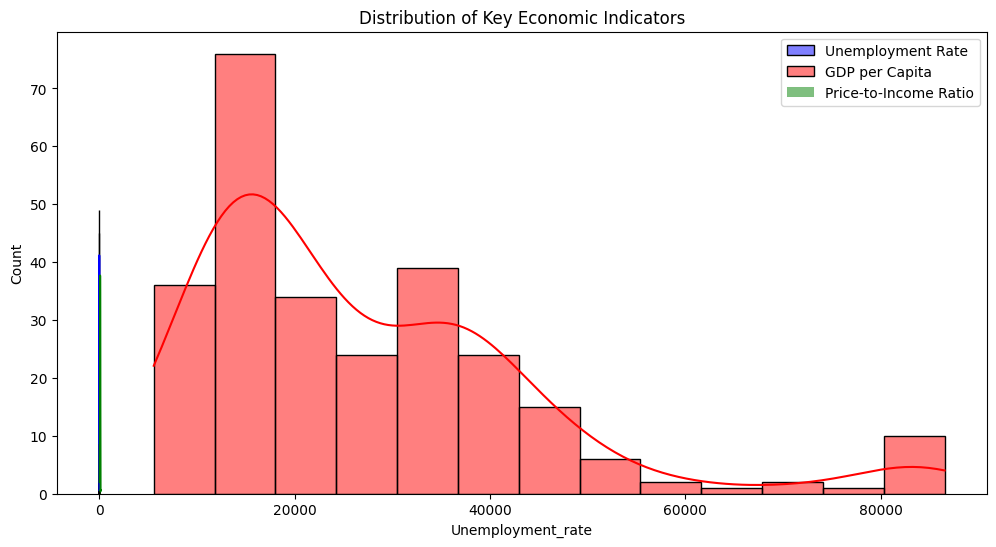

In [63]:
# Plot wage growth, inflation, and housing affordability distribution
plt.figure(figsize=(12, 6))
sns.histplot(main_data['Unemployment_rate'], kde=True, color='blue', label='Unemployment Rate')
sns.histplot(main_data['GDP_per_capita'], kde=True, color='red', label='GDP per Capita')
sns.histplot(main_data['price_to_income'], kde=True, color='green', label='Price-to-Income Ratio')
plt.legend()
plt.title('Distribution of Key Economic Indicators')
plt.show()

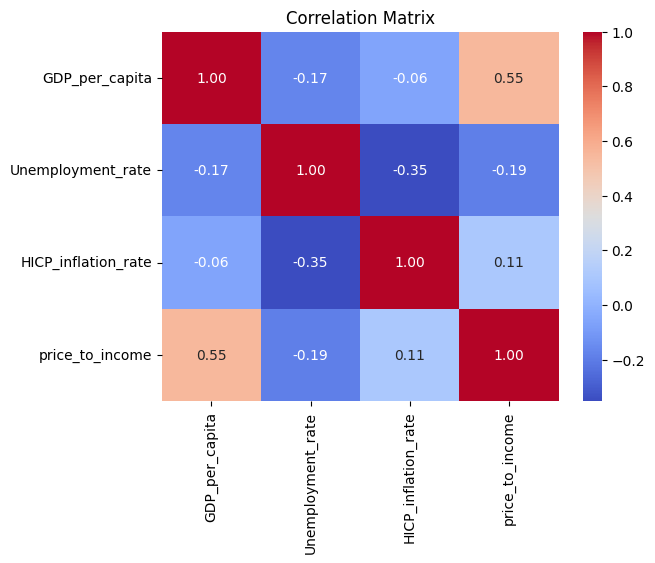

In [64]:
# Correlation Heatmap
corr_matrix = main_data[['GDP_per_capita', 'Unemployment_rate', 'HICP_inflation_rate', 'price_to_income']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Data Preperation for training purposes

In [ ]:
main_data = pd.read_csv('main_data.csv')

In [8]:
# Prepare the features and target variable
X = main_data[['GDP_per_capita', 'Unemployment_rate', 'HICP_inflation_rate']]
y = main_data['price_to_income']  # Housing affordability (Price to Income ratio)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model

Linear Regression Model Performance:
Mean Squared Error:  132.66724396812
R2 Score:  0.04642189517374662
Mean Absolute Error:  7.914959419397167
Root Mean Squared Error:  11.518126756036331


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


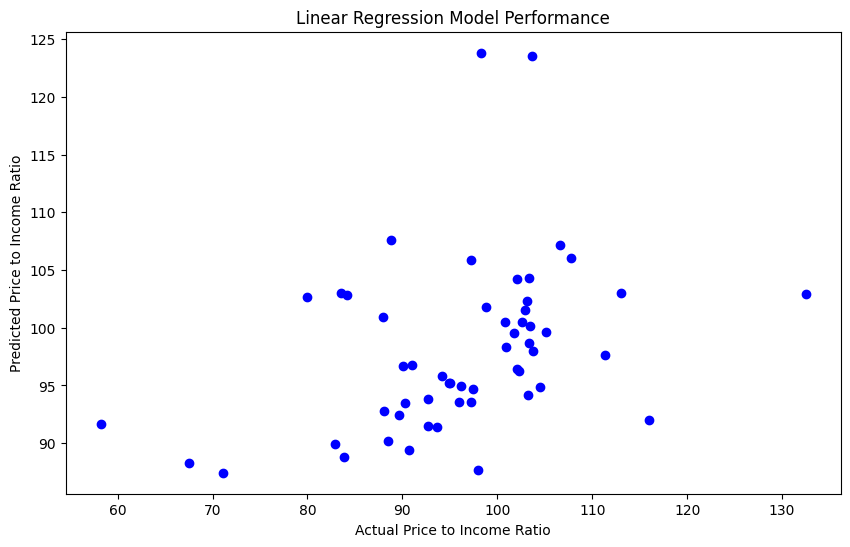

In [69]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate the model perfomance
mse_linear = mean_squared_error(y_test, linear_predictions)
r2_linear = r2_score(y_test, linear_predictions)
mae_linear = mean_absolute_error(y_test, linear_predictions)
rmse_linear = mean_squared_error(y_test, linear_predictions, squared=False)

print('Linear Regression Model Performance:')
print('Mean Squared Error: ', mse_linear)
print('R2 Score: ', r2_linear)
print('Mean Absolute Error: ', mae_linear)
print('Root Mean Squared Error: ', rmse_linear)

# Visualze the model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, color='blue')
plt.xlabel('Actual Price to Income Ratio')
plt.ylabel('Predicted Price to Income Ratio')
plt.title('Linear Regression Model Performance')

plt.show()

### Random Forest Model

Random Forest MAE: 6.762040740740732
Random Forest MSE: 97.12998290481465
Random Forest RMSE: 9.855454474797936
Random Forest R²: 0.30185460819223453


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


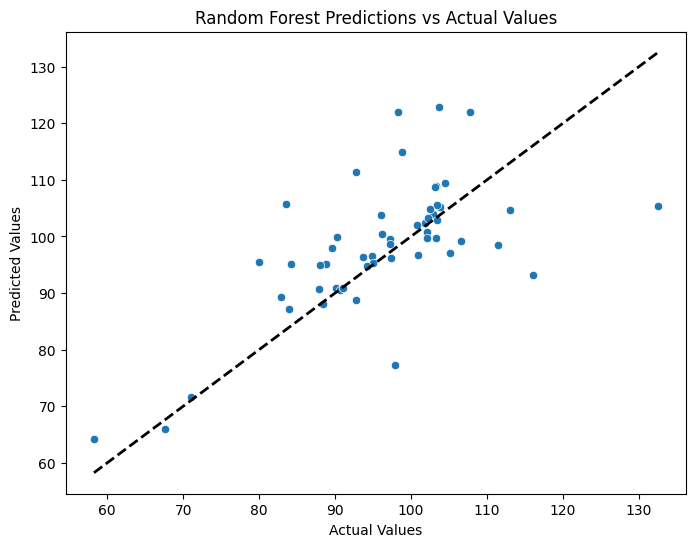

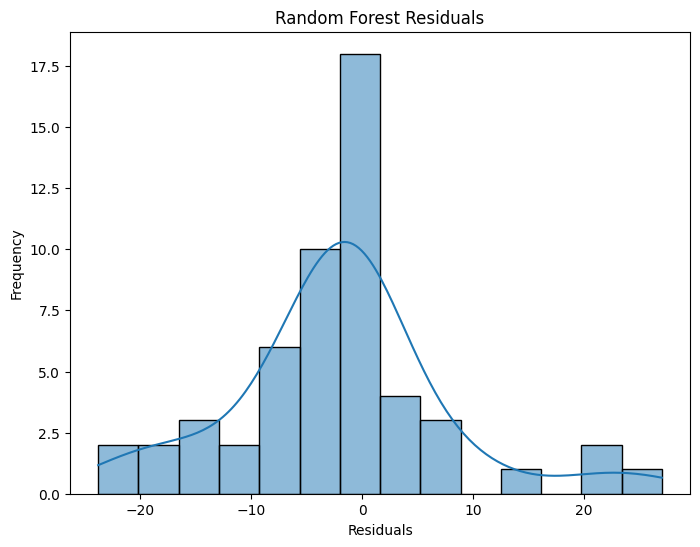

In [73]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Model evaluation
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2 = r2_score(y_test, rf_y_pred)

# Displaying evaluation metrics
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R²: {rf_r2}")

# Visualization: Actual vs Predicted values using Seaborn
plt.figure(figsize=(8, 6))

# Scatter plot for Actual vs Predicted values
sns.scatterplot(x=y_test, y=rf_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line

plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual Plot using Seaborn
plt.figure(figsize=(8, 6))

# Residuals (difference between actual and predicted values)
residuals = y_test - rf_y_pred
sns.histplot(residuals, kde=True)
plt.title('Random Forest Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### XGBoost Model

XGBoost MAE: 7.4894794351083265
XGBoost MSE: 129.7708766907831
XGBoost RMSE: 11.391702098052912
XGBoost R²: 0.06724023990296546


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


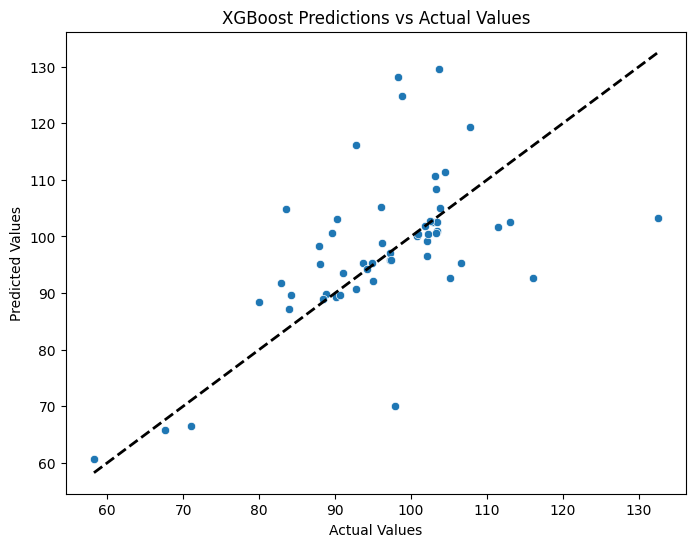

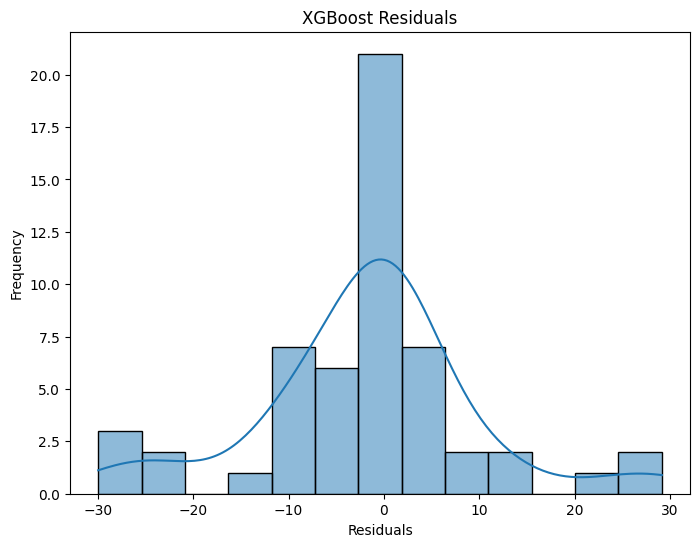

In [74]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_y_pred = xgb_model.predict(X_test)

# Model evaluation
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_y_pred)

# Displaying evaluation metrics
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost R²: {xgb_r2}")

# Visualization: Actual vs Predicted values using Seaborn
plt.figure(figsize=(8, 6))

# Scatter plot for Actual vs Predicted values
sns.scatterplot(x=y_test, y=xgb_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line

plt.title('XGBoost Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual Plot using Seaborn
plt.figure(figsize=(8, 6))

# Residuals (difference between actual and predicted values)
residuals_xgb = y_test - xgb_y_pred
sns.histplot(residuals_xgb, kde=True)
plt.title('XGBoost Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### Neural Network Training (Thought could be impresive on the grounds of deep learning has not been seen yet)

In [79]:
# Normalize the data for Neural Network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))  # Regression problem, so output is linear

# Compile the model
nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
nn_model.fit(X_scaled, y, epochs=125, batch_size=32, verbose=1)

# Predictions
nn_y_pred = nn_model.predict(X_scaled)

# Model evaluation
nn_rmse = mean_squared_error(y, nn_y_pred, squared=False)
nn_r2 = r2_score(y, nn_y_pred)

print(f"Neural Network RMSE: {nn_rmse}")
print(f"Neural Network R²: {nn_r2}")

# Visualization: Actual vs Predicted values using Plotly
fig = go.Figure()

# Add Scatter for Actual vs Predicted values
fig.add_trace(go.Scatter(x=y, y=nn_y_pred, mode='markers', name='Predicted vs Actual', 
                         marker=dict(color='blue', opacity=0.6, size=7)))

# Add Diagonal Line (perfect prediction line)
fig.add_trace(go.Scatter(x=[y.min(), y.max()], y=[y.min(), y.max()], mode='lines', 
                         name='Perfect Prediction', line=dict(color='red', dash='dash')))

# Update layout
fig.update_layout(title='Neural Network Predictions vs Actual Values',
                  xaxis_title='Actual Values',
                  yaxis_title='Predicted Values',
                  template='plotly_dark')

fig.show()

# Flatten predictions to 1D
nn_y_pred_flat = nn_y_pred.flatten()

# Residuals calculation
residuals_nn = y - nn_y_pred_flat

# Create the histogram of residuals
residuals_fig = go.Figure(data=[go.Histogram(x=residuals_nn, nbinsx=50, name='Residuals')])

# Update layout for residual plot
residuals_fig.update_layout(title='Neural Network Residuals',
                            xaxis_title='Residuals',
                            yaxis_title='Frequency',
                            template='plotly_dark')

residuals_fig.show()


Epoch 1/125


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9835.8818  
Epoch 2/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9463.3506 
Epoch 3/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9529.6230 
Epoch 4/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9273.8027 
Epoch 5/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9192.1074 
Epoch 6/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9093.8994 
Epoch 7/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8982.2637 
Epoch 8/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8687.9180 
Epoch 9/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8491.1377 
Epoch 10/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8181.4565 
Epoch 11/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7721.6914 
Epoch 12/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7282.3540 
Epoch 13/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6944.5376 
Epoch 14/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6407.4038 
Epoch 15/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



### Model Comparison Visualization

In [90]:
# Define the models and their performance metrics
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Neural Network']
rmse_values = [rmse_linear, rf_rmse, xgb_rmse, nn_rmse]
r2_values = [r2_linear, rf_r2, xgb_r2, nn_r2]

# Create a Plotly bar chart for RMSE
rmse_fig = go.Figure()

rmse_fig.add_trace(go.Bar(
    x=models,
    y=rmse_values,
    name='RMSE',
    marker=dict(color='skyblue'),
))

rmse_fig.update_layout(
    title='Model Comparison: RMSE',
    xaxis_title='Models',
    yaxis_title='RMSE',
    template='plotly_dark',
    showlegend=False,
    plot_bgcolor='rgba(0, 0, 0, 0)',
)

# Show the RMSE chart
rmse_fig.show()

# Create a Plotly bar chart for R²
r2_fig = go.Figure()

r2_fig.add_trace(go.Bar(
    x=models,
    y=r2_values,
    name='R²',
    marker=dict(color='lightgreen'),
))

r2_fig.update_layout(
    title='Model Comparison: R²',
    xaxis_title='Models',
    yaxis_title='R²',
    template='plotly_dark',
    showlegend=False,
    plot_bgcolor='rgba(0, 0, 0, 0)',
)

# Show the R² chart
r2_fig.show()


In [23]:
from tensorflow.keras.callbacks import Callback
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Custom Callback for Metrics
class MetricsCallback(Callback):
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.pbar = tqdm(total=200, desc="Training Progress", position=0, leave=True)
        self.train_rmse_history = [] 
        self.test_rmse_history = []   

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 20 == 0:
            # Predictions for train and test sets
            train_pred = self.model.predict(self.X_train, verbose=0)
            test_pred = self.model.predict(self.X_test, verbose=0)

            # Calculate metrics
            train_rmse = mean_squared_error(self.y_train, train_pred, squared=False)
            test_rmse = mean_squared_error(self.y_test, test_pred, squared=False)
            test_r2 = r2_score(self.y_test, test_pred)

            # Store metrics in history lists
            self.train_rmse_history.append(train_rmse)
            self.test_rmse_history.append(test_rmse)

            # Print metrics
            print(f"Epoch {epoch + 1}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}, Test R² = {test_r2:.4f}")

        # Update progress bar
        self.pbar.update(1)

    def on_train_end(self, logs=None):
        self.pbar.close()



# Reshape data for LSTM (assuming time steps) (Again thought could be impressive using LSTM, maybe I'll try ARIMA later too)
time_steps = 3
X_sequence, y_sequence = [], []

for i in range(len(X) - time_steps):
    X_sequence.append(X.iloc[i:i + time_steps].values)
    y_sequence.append(y.iloc[i + time_steps])

X_sequence = np.array(X_sequence)
y_sequence = np.array(y_sequence)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sequence, y_sequence, test_size=0.2, random_state=42)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='linear'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Initialize the callback instance
metrics_callback = MetricsCallback(X_train, y_train, X_test, y_test)

# Train the model with tqdm and custom metrics callback
lstm_model.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=32, 
    verbose=0, 
    callbacks=[metrics_callback]
)


# Final Evaluation
lstm_y_pred = lstm_model.predict(X_test, verbose=0)
lstm_rmse = mean_squared_error(y_test, lstm_y_pred, squared=False)
lstm_r2 = r2_score(y_test, lstm_y_pred)

print(f"Final LSTM RMSE: {lstm_rmse}")
print(f"Final LSTM R²: {lstm_r2}")


  0%|          | 0/200 [11:10<?, ?epoch/s]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

Training Progress:   9%|▉         | 18/200 [00:04<00:15, 11.61it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress:  12%|█▏        | 24/200 [0

Epoch 20: Train RMSE = 95.4300, Test RMSE = 95.5104, Test R² = -70.7679


Training Progress:  20%|█▉        | 39/200 [00:05<00:07, 21.77it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress:  22%|██▎       | 45/200 [00:05<00:07, 19.80it/s]

Epoch 40: Train RMSE = 87.8495, Test RMSE = 87.8866, Test R² = -59.7679


Training Progress:  28%|██▊       | 57/200 [00:06<00:06, 21.93it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress:  32%|███▏      | 63/200 [00:06<00:07, 19.36it/s]

Epoch 60: Train RMSE = 76.2038, Test RMSE = 76.1572, Test R² = -44.6301


Training Progress:  39%|███▉      | 78/200 [00:07<00:05, 22.14it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress:  42%|████▏     | 84/200 [00:07<00:05, 20.27it/s]

Epoch 80: Train RMSE = 61.9671, Test RMSE = 61.7743, Test R² = -29.0224


Training Progress:  50%|████▉     | 99/200 [00:08<00:04, 24.00it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress:  51%|█████     | 102/200 [00:08<00:05, 18.87it/s]

Epoch 100: Train RMSE = 47.0053, Test RMSE = 46.5592, Test R² = -16.0545


Training Progress:  58%|█████▊    | 117/200 [00:08<00:03, 23.59it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress:  62%|██████▏   | 123/200 [00:09<00:03, 21.63it/s]

Epoch 120: Train RMSE = 33.4413, Test RMSE = 32.5541, Test R² = -7.3376


Training Progress:  69%|██████▉   | 138/200 [00:09<00:02, 24.72it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress:  72%|███████▏  | 144/200 [00:10<00:02, 21.39it/s]

Epoch 140: Train RMSE = 23.3215, Test RMSE = 21.7158, Test R² = -2.7101


Training Progress:  80%|███████▉  | 159/200 [00:10<00:01, 25.64it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress:  82%|████████▎ | 165/200 [00:11<00:01, 21.56it/s]

Epoch 160: Train RMSE = 17.6497, Test RMSE = 15.1491, Test R² = -0.8055


Training Progress:  88%|████████▊ | 177/200 [00:11<00:00, 24.19it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress:  92%|█████████▏| 183/200 [00:11<00:00, 21.67it/s]

Epoch 180: Train RMSE = 15.5128, Test RMSE = 12.3625, Test R² = -0.2024


Training Progress:  99%|█████████▉| 198/200 [00:12<00:00, 26.59it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

Training Progress: 100%|██████████| 200/200 [00:12<00:00, 15.84it/s]

Epoch 200: Train RMSE = 14.9654, Test RMSE = 11.5387, Test R² = -0.0475
Final LSTM RMSE: 11.538665914234718
Final LSTM R²: -0.04746703357953641



c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [26]:
import plotly.graph_objects as go  


# Have used different kind of visualization libraries over the course of this project, and plotly/go is the one I liked most
# Use the logged RMSE values from the callback
epochs = list(range(1, len(metrics_callback.train_rmse_history) + 1))

# RMSE Progression Plot
fig_rmse = go.Figure()

# Plot train RMSE
fig_rmse.add_trace(go.Scatter(x=epochs, y=metrics_callback.train_rmse_history, mode='lines', name='Train RMSE', line=dict(color='blue')))

# Plot test RMSE
fig_rmse.add_trace(go.Scatter(x=epochs, y=metrics_callback.test_rmse_history, mode='lines', name='Test RMSE', line=dict(color='red')))

# Update layout
fig_rmse.update_layout(
    title="RMSE over Epochs",
    xaxis_title="Epochs",
    yaxis_title="RMSE",
    legend=dict(orientation="h", x=0.5, y=-0.2, xanchor="center"),
    template="plotly_dark",
)

# Show plot
fig_rmse.show()

### Hypothesis

In [10]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 9.9/9.9 MB 68.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
'''I have been preparing this project for a while now, and every time I get an idea and come apply,
that is why there is a lot of different kind of things in this project, including deep learning and time series, hope worth it.'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Do not want to take the risk of losing the main dataset, so I will work on a copy of it
df = main_data.copy()

### Inflation Rate Impact Analysis


In [28]:
def analyze_inflation_impact(df):
    print("INFLATION RATE IMPACT ANALYSIS")
    print("---------------------------------")
    
    # Time series preparation
    df_grouped = df.groupby('Year').agg({
        'HICP_inflation_rate': 'mean',
        'price_to_income': 'mean'
    }).reset_index()
    
    # 1. Hypothesis Testing
    correlation, p_value = stats.pearsonr(df_grouped['HICP_inflation_rate'], 
                                        df_grouped['price_to_income'])
    print(f"Hypothesis Test Results:")
    print(f"Correlation: {correlation:.3f}")
    print(f"P-value: {p_value:.4f}")
    
    # 2. Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df_grouped, x='HICP_inflation_rate', y='price_to_income')
    plt.title('Inflation Rate vs Price-to-Income')
    
    plt.subplot(1, 2, 2)
    sns.lineplot(data=df_grouped, x='Year', y='price_to_income', label='Price-to-Income')
    plt.twinx()
    sns.lineplot(data=df_grouped, x='Year', y='HICP_inflation_rate', color='red', label='Inflation')
    plt.title('Trends Over Time')
    plt.tight_layout()
    plt.show()
    
    # 3. Model Fitting and Residual Analysis
    X = sm.add_constant(df_grouped['HICP_inflation_rate'])
    model = sm.OLS(df_grouped['price_to_income'], X).fit()
    
    # Residual Analysis
    residuals = model.resid
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution')
    
    plt.subplot(1, 2, 2)
    sm.graphics.plot_regress_exog(model, 1)
    plt.tight_layout()
    plt.show()
    
    # 4. Cross-validation
    X = df_grouped['HICP_inflation_rate'].values.reshape(-1, 1)
    y = df_grouped['price_to_income'].values
    tscv = TimeSeriesSplit(n_splits=3)
    rf_model = RandomForestRegressor(random_state=42)
    cv_scores = cross_val_score(rf_model, X, y, cv=tscv)
    print(f"\n4. Cross-validation scores: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    return model

INFLATION RATE IMPACT ANALYSIS
---------------------------------
Hypothesis Test Results:
Correlation: 0.754
P-value: 0.0117


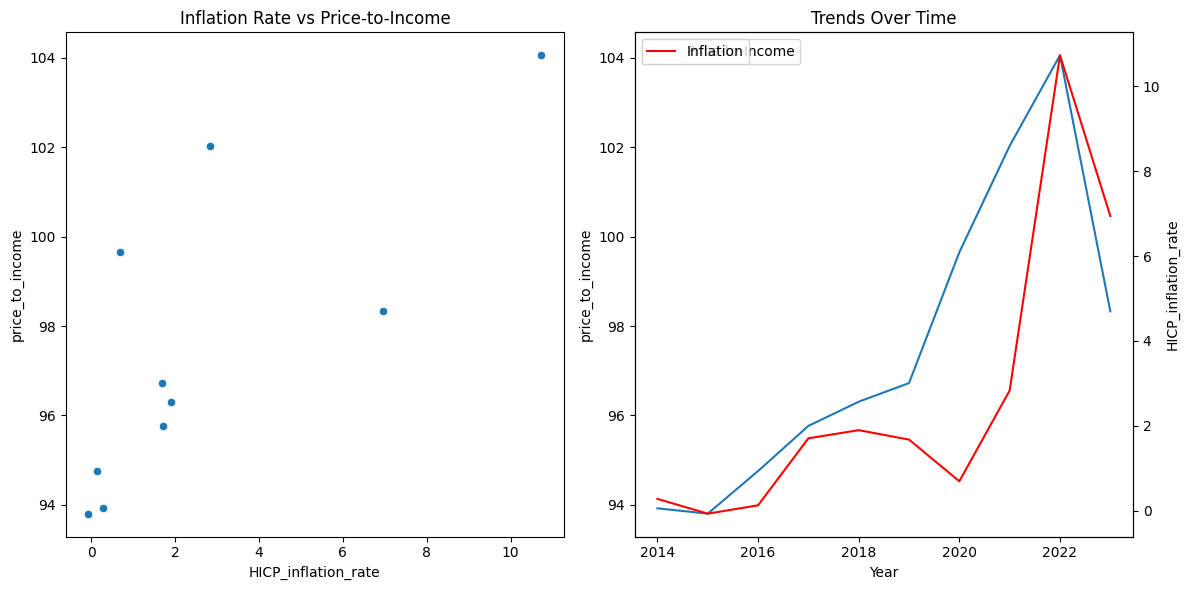

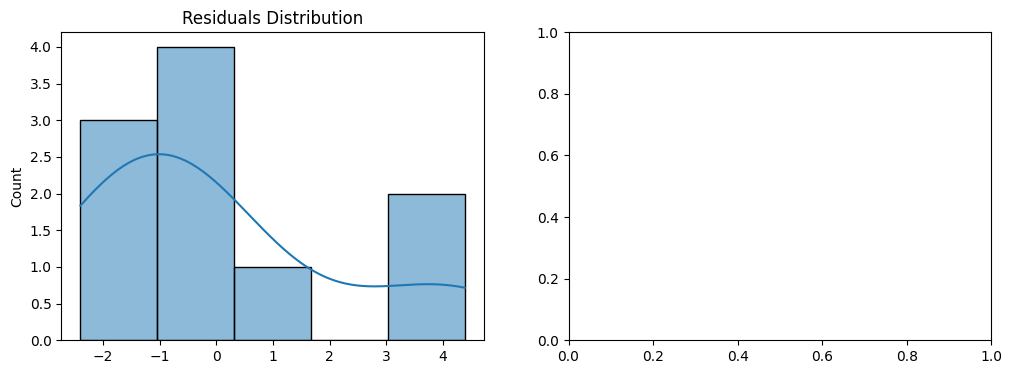

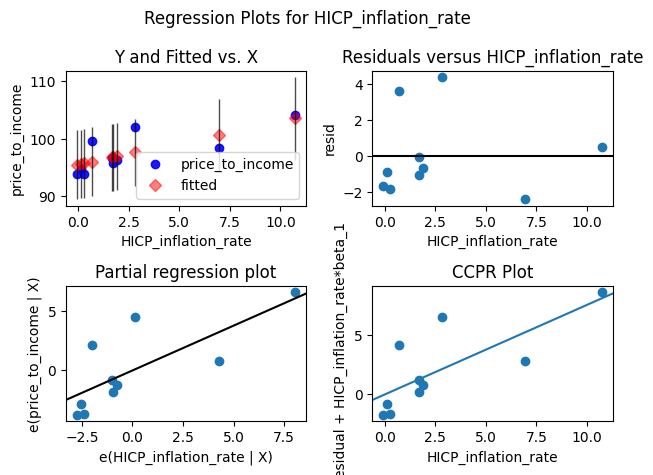


4. Cross-validation scores: -19.192 (+/- 29.173)


In [29]:
inflation_model = analyze_inflation_impact(df)

### Country Clustering Analysis

In [26]:
def perform_clustering_analysis(df):
    print("COUNTRY CLUSTERING ANALYSIS")
    print("------------------------------")
    
    # Prepare features for clustering
    features = ['GDP_per_capita', 'Unemployment_rate', 'HICP_inflation_rate', 'price_to_income']
    X = df[features].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Find optimal number of clusters
    silhouette_scores = []
    K = range(2, 8)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    
    optimal_k = K[np.argmax(silhouette_scores)]
    
    # Perform clustering with optimal K
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Plot 1: GDP vs Price-to-Income by cluster
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=df, x='GDP_per_capita', y='price_to_income', hue='Cluster', palette='deep')
    plt.title('GDP vs Price-to-Income by Cluster')
    
    # Plot 2: Unemployment vs Inflation by cluster
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=df, x='Unemployment_rate', y='HICP_inflation_rate', hue='Cluster', palette='deep')
    plt.title('Unemployment vs Inflation by Cluster')
    
    # Plot 3: Cluster characteristics
    plt.subplot(1, 3, 3)
    cluster_means = df.groupby('Cluster')[features].mean()
    sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title('Cluster Characteristics')
    
    plt.tight_layout()
    plt.show()
    
    return kmeans, X_scaled

COUNTRY CLUSTERING ANALYSIS
------------------------------


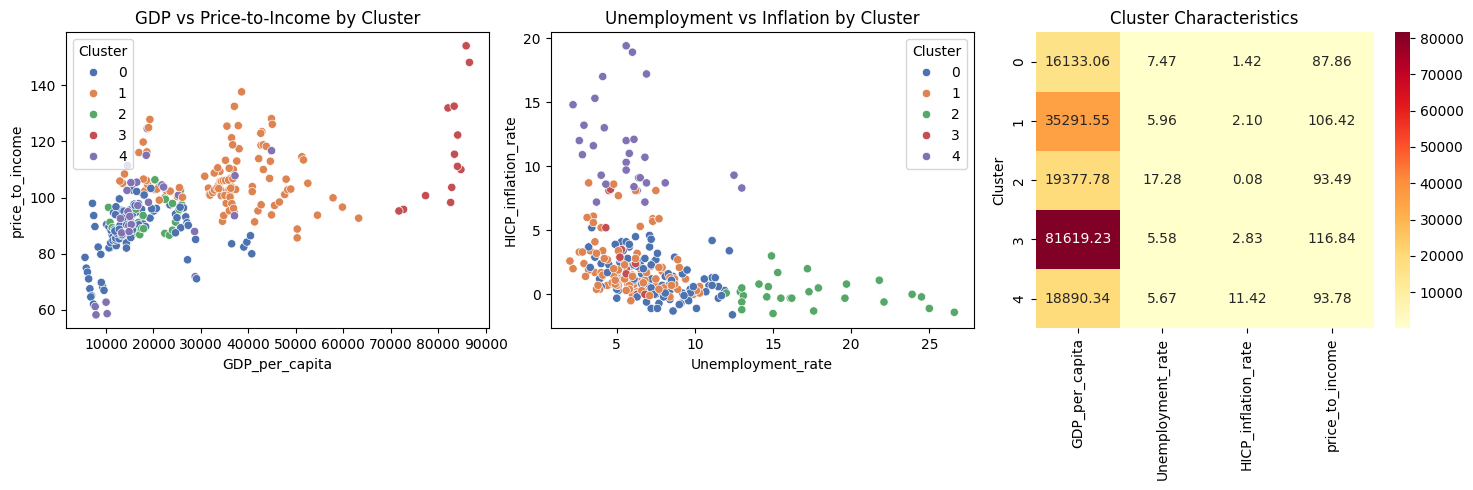

In [27]:
clustering_model, X_scaled = perform_clustering_analysis(df)

### Combined GDP-Unemployment Analysis

In [24]:
def analyze_gdp_unemployment_interaction(df):
    print("GDP-UNEMPLOYMENT INTERACTION ANALYSIS")
    print("---------------------------------------")
    
    # Create interaction term
    df['GDP_Unemployment_Interaction'] = df['GDP_per_capita'] * df['Unemployment_rate']
    
    # Prepare features
    X = df[['GDP_per_capita', 'Unemployment_rate', 'GDP_Unemployment_Interaction']]
    y = df['price_to_income']
    
    # Add constant for statsmodels
    X = sm.add_constant(X)
    
    # Fit model
    model = sm.OLS(y, X).fit()
    print(model.summary())
    
    # Visualization of interactions
    plt.figure(figsize=(15, 5))
    
    # Plot 1: 3D Surface Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['GDP_per_capita'], df['Unemployment_rate'], df['price_to_income'])
    ax.set_xlabel('GDP per capita')
    ax.set_ylabel('Unemployment rate')
    ax.set_zlabel('Price-to-Income')
    plt.title('3D Relationship Plot')
    plt.show()
    
    # Correlation Matrix
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[['GDP_per_capita', 'Unemployment_rate', 
                           'GDP_Unemployment_Interaction', 'price_to_income']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()
    
    # Model Diagnostics
    # 1. VIF Analysis
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVariance Inflation Factors:")
    print(vif_data)
    
    # 2. Heteroscedasticity Test
    _, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
    print(f"\nBreusch-Pagan Test p-value: {p_value:.4f}")
    
    return model

GDP-UNEMPLOYMENT INTERACTION ANALYSIS
---------------------------------------
                            OLS Regression Results                            
Dep. Variable:        price_to_income   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     40.49
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.39e-21
Time:                        22:50:00   Log-Likelihood:                -1048.2
No. Observations:                 270   AIC:                             2104.
Df Residuals:                     266   BIC:                             2119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

<Figure size 1500x500 with 0 Axes>

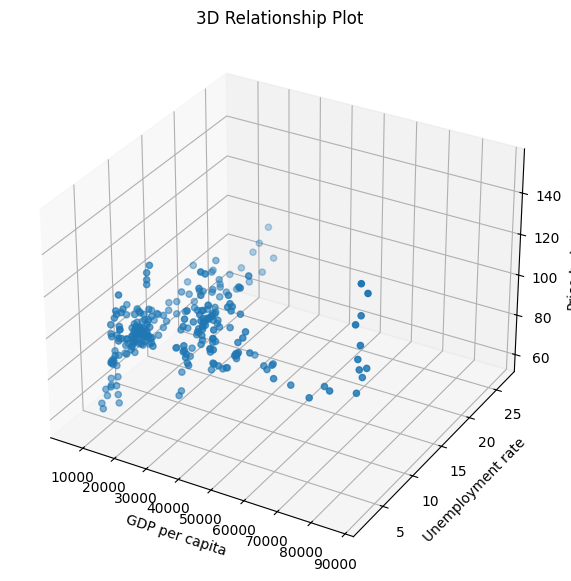

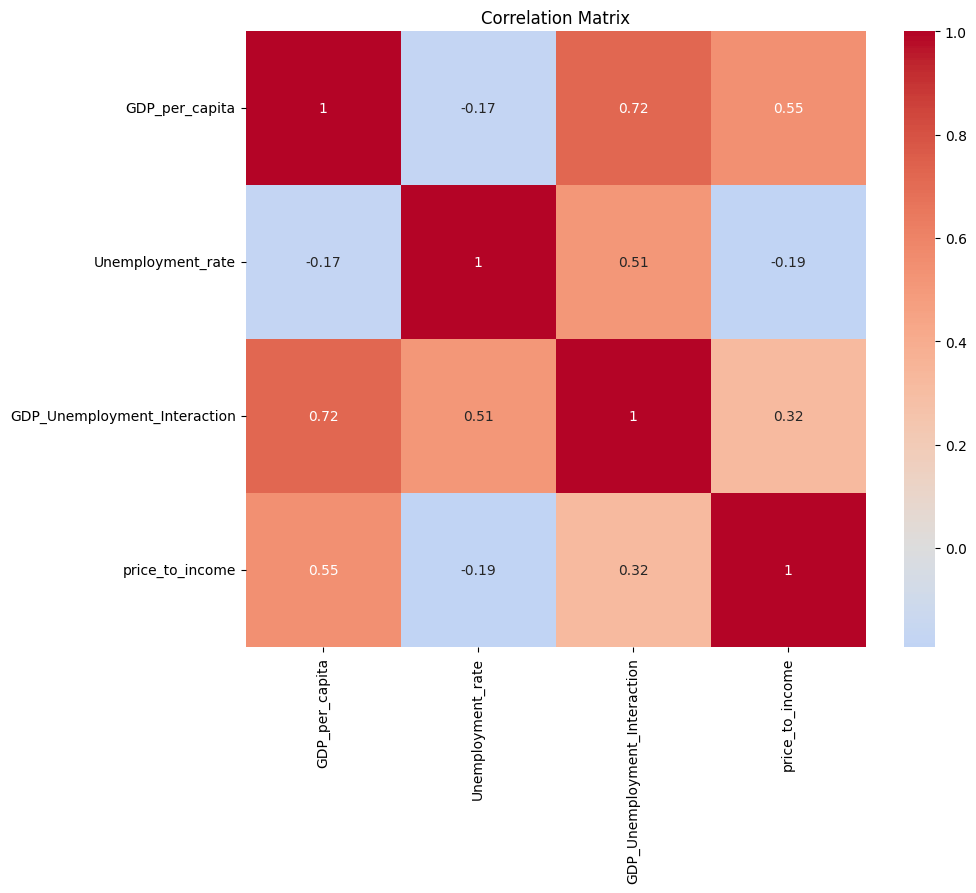


Variance Inflation Factors:
                       Variable        VIF
0                         const  23.985473
1                GDP_per_capita  12.479028
2             Unemployment_rate   8.006649
3  GDP_Unemployment_Interaction  16.348584

Breusch-Pagan Test p-value: 0.0010


In [25]:
interaction_model = analyze_gdp_unemployment_interaction(df)

### Feature Importance Analysis for all models of the last adjustments

In [21]:
def analyze_feature_importance(df):
    features = ['GDP_per_capita', 'Unemployment_rate', 'HICP_inflation_rate']
    X = df[features]
    y = df['price_to_income']
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': rf_model.feature_importances_
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature')
    plt.title('Feature Importance Analysis')
    plt.show()
    
    return importance_df

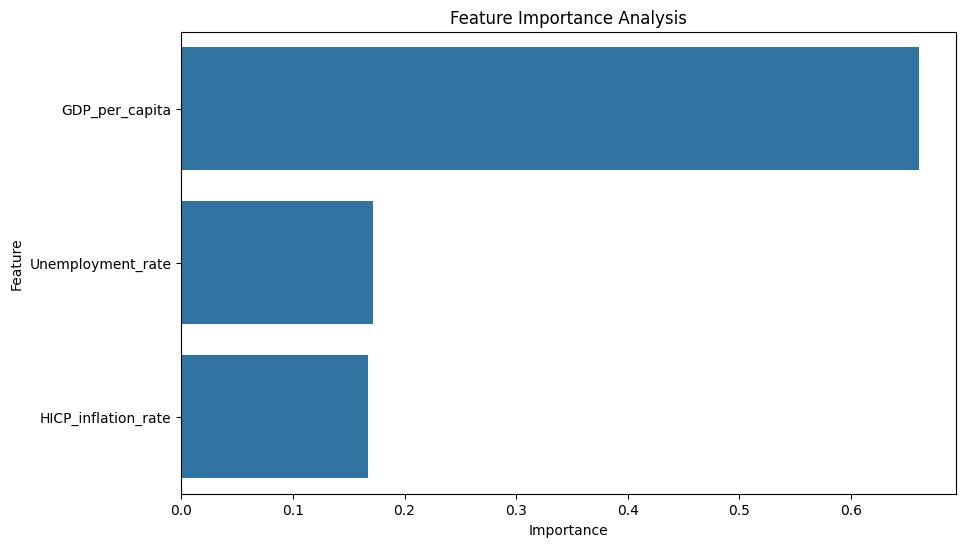

In [22]:
feature_importance = analyze_feature_importance(df)